In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prst = pd.read_csv("prst.csv")
prst.head()

,Unnamed: 0,Adaptable,BestValue,CuttingEdge,Delightful,Exciting,Friendly,Generous,Helpful,Intuitive,Brand
0,1,6,5,4,4,3,4,5,4,3,Sierra
1,2,4,3,4,2,4,4,5,2,5,Romeo
2,3,3,2,3,6,5,5,6,4,3,Sierra
3,4,4,1,4,4,5,4,5,3,3,Sierra
4,5,4,1,3,3,3,5,5,4,4,Sierra


In [3]:
from sklearn.preprocessing import StandardScaler

prst_sc = pd.DataFrame(StandardScaler().fit_transform(prst.iloc[:,:-1]))
prst_sc.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.731483,1.790983,1.104656,-0.066166,0.017723,-0.888286,-0.243535,1.022783,0.098305,-0.752006
1,-1.730347,-0.262202,-0.814023,-0.066166,-2.022098,0.107038,-0.243535,1.022783,-1.752491,1.324606
2,-1.729211,-1.288794,-1.773363,-1.004800,2.057544,1.102362,0.746840,2.078805,0.098305,-0.752006
3,-1.728076,-0.262202,-2.732703,-0.066166,0.017723,1.102362,-0.243535,1.022783,-0.827093,-0.752006
4,-1.726940,-0.262202,-2.732703,-1.004800,-1.002188,-0.888286,0.746840,1.022783,0.098305,0.286300


In [4]:
prst_sc = prst_sc.assign(Brand = prst["Brand"])

In [23]:
prst_mean = prst_sc.groupby('Brand').mean().reset_index()
prst_mean = prst_mean.set_index(prst_mean.columns[0])
prst_mean

,0,1,2,3,4,5,6,7,8,9
Brand,,,,,,,,,,
Papa,-0.124877,0.148435,-0.133958,-0.560513,-0.462768,-0.507851,0.436522,-0.284337,0.435561,0.475503
Romeo,0.002986,0.049973,-0.032006,-0.148516,-0.052646,-0.126956,0.126801,-0.087209,0.088057,0.157175
Sierra,0.014167,-0.085140,0.023577,0.220709,0.128008,0.190649,-0.192202,0.112094,-0.161369,-0.206408
Tango,0.119990,-0.098348,0.232813,0.585068,0.413063,0.534995,-0.424189,0.341701,-0.387002,-0.545698


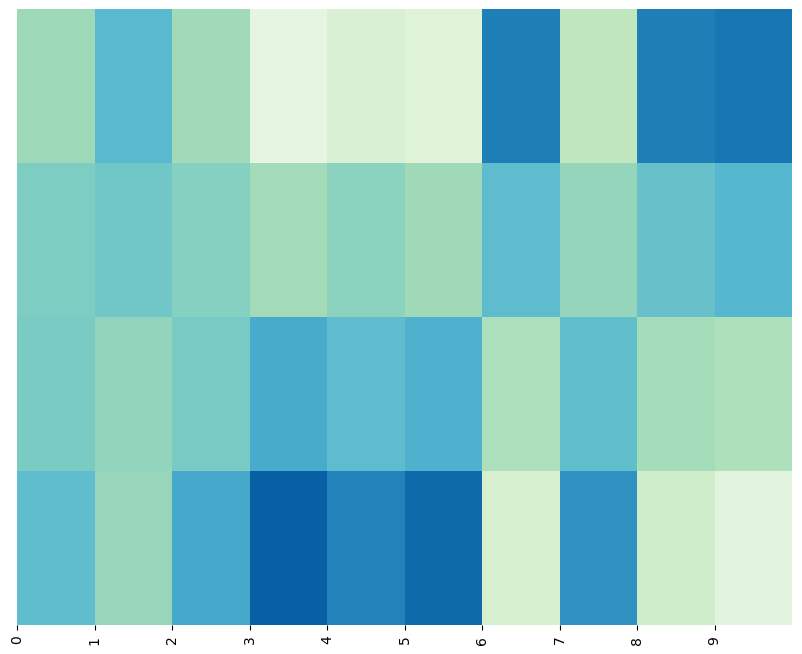

In [6]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Assuming your DataFrame with mean values is named 'prst_mean'
prst_mean_matrix = prst_mean.to_numpy()

# Create a custom colormap using ColorBrewer's GnBu palette
cmap = LinearSegmentedColormap.from_list("GnBu", sns.color_palette("GnBu", 9))

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(prst_mean_matrix, cmap=cmap, annot=False, xticklabels=prst_mean.columns, yticklabels=prst_mean.index, cbar=False, ax=ax)

# Remove the dendrogram and the color legend
ax.set_yticks([])
ax.set_xticks(range(len(prst_mean.columns)))
ax.set_xticklabels(prst_mean.columns, rotation=90)

plt.show()

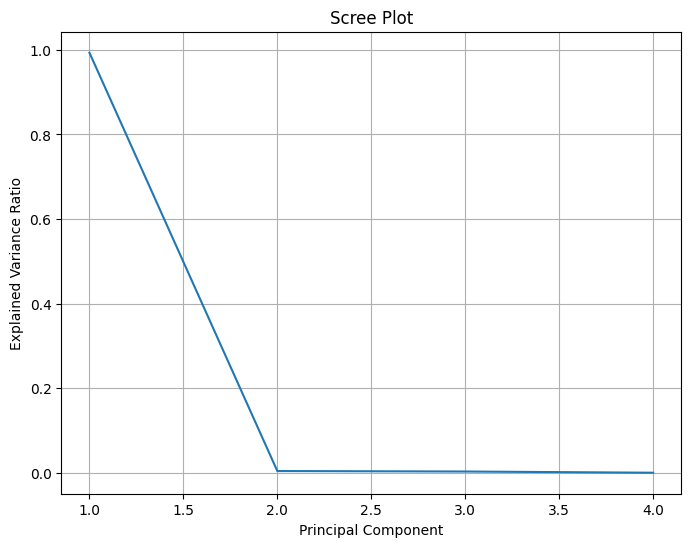

In [7]:
from sklearn.decomposition import PCA

# Assuming your DataFrame with mean values is named 'prst_mean'
prst_pca = PCA()
prst_pca.fit(prst_mean.iloc[:, :-1].to_numpy())

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(prst_pca.explained_variance_ratio_) + 1), prst_pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

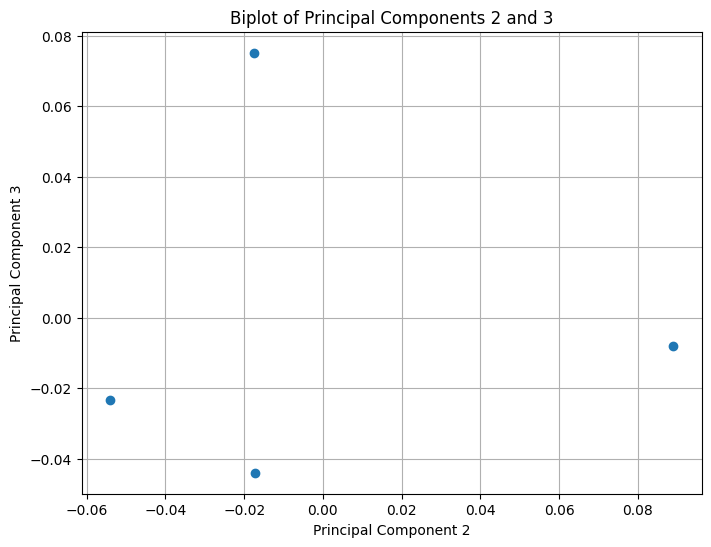

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(prst_pca.transform(prst_mean.iloc[:, :-1].to_numpy())[:, 1],
            prst_pca.transform(prst_mean.iloc[:, :-1].to_numpy())[:, 2])

# Add loadings as vectors
# loading = prst_pca.components_.T[:, 1:3]
# plt.quiver(0, 0, loading[:, 0], loading[:, 1], angles='xy', scale_units='xy', scale=1, color='r')

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('Biplot of Principal Components 2 and 3')
plt.grid()
plt.show()

In [9]:
corr_matrix = prst_sc.iloc[:, :-1].corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.95817588 1.84450487 1.23553566 0.99974788 0.83131367 0.52940554
 0.58166768 0.6059195  0.71736306 0.69636625]

Eigenvectors:
[[ 0.02982831  0.03886437  0.02301143 -0.9944653  -0.06415897 -0.02098235
  -0.01991829  0.01952767 -0.05197675  0.00853203]
 [ 0.45452314 -0.0230508  -0.48477003 -0.02072343 -0.02444978  0.64554834
   0.32355792 -0.18172279 -0.00520139 -0.04873939]
 [ 0.1997553  -0.02505573 -0.75871286  0.01133924 -0.03481668 -0.53210334
  -0.2831476   0.13180679 -0.03804497  0.01889632]
 [ 0.00913156  0.55020134 -0.05012836  0.00511764  0.14017544  0.17691222
   0.03851523  0.70520098  0.33265288  0.18509234]
 [ 0.01241721  0.49238367  0.00510704  0.04271072  0.29176881  0.03052702
  -0.05923113 -0.05955297 -0.81380878 -0.0123808 ]
 [ 0.02061953  0.53205803 -0.02695683 -0.03045813  0.27883822 -0.16369863
  -0.04277872 -0.60338563  0.46414715 -0.17014675]
 [ 0.48827571 -0.01204743  0.25904913  0.02710172 -0.03610279  0.10616943
  -0.50377548  0.18119876  0.027199

In [11]:
from sklearn.decomposition import FactorAnalysis

# Assuming your DataFrame with standardized values is named 'prst_sc'
fa = FactorAnalysis(n_components=3, rotation='varimax')
factor_loadings = fa.fit_transform(prst_sc.iloc[:, :-1])

print("Factor Loadings:")
print(fa.components_.T)

print("\nUnique Variances:")
print(fa.noise_variance_)

print("\nCorrelation Matrix of Factors:")
print(fa.get_covariance())

Factor Loadings:
[[ 2.56164656e-02 -3.29742482e-02  4.24212812e-03]
 [ 3.13439678e-01  8.31654110e-04  6.26419821e-01]
 [-6.31468243e-02  5.92043193e-04  6.43872634e-01]
 [-9.88623548e-03 -6.47549093e-01  9.75631753e-03]
 [ 1.40947369e-02 -4.97921158e-01 -2.06418014e-02]
 [ 1.04432023e-02 -5.96189851e-01  1.90111668e-03]
 [ 5.69984066e-01  9.61613052e-03  6.94672413e-02]
 [ 9.86940951e-03 -3.75156482e-01 -2.66592663e-02]
 [ 5.39987263e-01  1.04558130e-02  8.51567931e-02]
 [ 6.99487820e-01 -1.58218581e-02  7.88257539e-02]]

Unique Variances:
[0.99823781 0.50930063 0.58160009 0.58078233 0.75138864 0.64427815
 0.66982596 0.85843799 0.70079938 0.50518531]

Correlation Matrix of Factors:
[[ 9.99999306e-01  1.06591467e-02  1.09426958e-03  2.11405816e-02
   1.66920680e-02  1.99344948e-02  1.45785815e-02  1.25102303e-02
   1.38490386e-02  1.87745085e-02]
 [ 1.06591467e-02  9.99947546e-01  3.83542352e-01  2.47427535e-03
  -8.92668193e-03  3.96838739e-03  2.22179276e-01 -1.39184287e-02
   2.2260

In [57]:
from scipy.spatial.distance import pdist
from sklearn.manifold import MDS

# Assuming your DataFrame is named 'prst'
prst_dist = pdist(prst_mean.to_numpy())
prst_mds = MDS(dissimilarity='precomputed').fit_transform(prst_d)

print("Distance matrix:")
print(prst_dist)

print("MDS coordinates:")
print(prst_mds)

Distance matrix:
[0.93612916 1.70871675 2.50490614 0.79195771 1.58312818 0.81259228]
MDS coordinates:
[[ 1.14354705  0.57131888]
 [ 0.37969646 -0.00878537]
 [-0.4655936   0.02873693]
 [-1.0576499  -0.59127044]]


In [56]:
prst_d = np.zeros((4,4))
prst_d[0,1:4] = prst_dist[0:3]
prst_d[1:4:,0] = prst_dist[0:3]

prst_d[1,2:4] = prst_dist[3:5]
prst_d[2:4,1] = prst_dist[3:5]

prst_d[2,3] = prst_dist[5]
prst_d[3,2] = prst_dist[5]

prst_d

array([[0.        , 0.93612916, 1.70871675, 2.50490614],
       [0.93612916, 0.        , 0.79195771, 1.58312818],
       [1.70871675, 0.79195771, 0.        , 0.81259228],
       [2.50490614, 1.58312818, 0.81259228, 0.        ]])

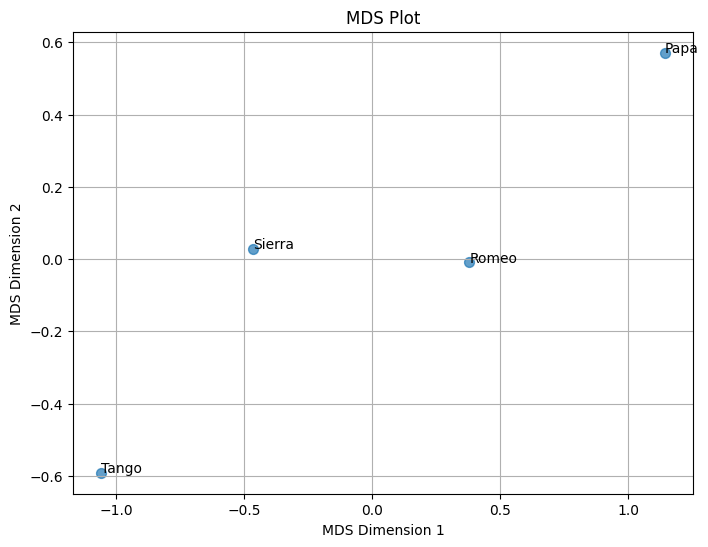

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(prst_mds[:, 0], prst_mds[:, 1], s=50, alpha=0.7)

# Add text labels for the row names
for i, label in enumerate(prst_mean.index):
    try:
        plt.text(prst_mds[i, 0], prst_mds[i, 1], label, fontsize=10)
    except IndexError:
        break
# Customize the plot
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Plot')
plt.grid()
plt.show()